#MACHINE LEARNING - MINI PROJECT
##Introdution
####India is one among the oldest countries which is still practicing agriculture. But in recent times the trends in agriculture has drastically evolved due to globalization. Various factors have affected the health of agriculture in India. Many new technologies have been evolved to regain the health. One such technique is precision agriculture. Precision agriculture is budding in India .Precision agriculture is the technology of “site-specific” farming.
####Precision agriculture is a modern farming technique that uses research data of soil characteristics, soil types, crop yield data collection and suggests the farmers the right crop based on their sitespecific parameters.
####This reduces the wrong choice on a crop and increase in productivity.

####Solution : By using this machine learning model we will analyse the needs of each typeof crop and by using decision tree we will predict by using parameters that a particulatr piece of lands is good for which crop.

##Various Parameters Affecting Agricultural Productivity
###N
####P
####K
####temperature
####humidity
####ph
####rainfall
####crop names

##Machine Learning Algorithm Used --> Decision Tree

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
# dataset
data=pd.read_csv("/content/Crop_Dataset.csv")
df=data.copy()

In [35]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [37]:
df.size

17600

In [38]:
#checking of null values
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [39]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

##Independent parameters taken as x
####N
####P
####K
####Temperature
####Humidity
####pH
####Rainfall

##Dependent parameters taken as y
####label

###Splitting the dataset in to Train, Test

In [40]:
features = df.drop('label',axis=1)
target = df['label']
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.33,shuffle=True,random_state=0)

In [41]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1829,33,14,35,27.148653,96.663552,6.027707,149.243350
1051,116,81,55,26.423133,83.699504,5.915546,95.123221
347,13,72,21,24.321166,21.027867,5.821194,60.275525
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
121,99,50,15,18.147101,71.094453,5.573286,88.077537
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [42]:
y_train

,label
1829,coconut
1051,banana
347,kidneybeans
1576,apple
121,maize
...,...
1033,banana
1731,papaya
763,blackgram
835,lentil


In [43]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
1523,34,140,198,21.704170,93.440063,5.751707,115.178140
731,25,65,21,33.863512,68.592323,6.880246,69.244641
1545,15,133,199,23.996862,91.610017,5.824779,117.610292
1358,91,7,52,25.078037,83.462305,6.405054,56.399629


In [44]:
y_test

,label
1320,watermelon
1367,watermelon
1291,grapes
264,chickpea
728,blackgram
...,...
1523,apple
731,blackgram
1545,apple
1358,watermelon


##Model Training

In [45]:
from sklearn import linear_model
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import metrics

In [46]:
dtree=DecisionTreeClassifier(criterion="entropy",random_state=0)
fitted_data=dtree.fit(X_train,y_train)
predictiontree=dtree.predict(X_test)

In [47]:
dot_data=export_graphviz(dtree,out_file=None,feature_names=['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall'],class_names=target)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("agri.pdf")

True

In [48]:
y_train_predd=dtree.predict(X_train)
y_test_predd=dtree.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
cmtrain=confusion_matrix(y_train,y_train_predd)

In [50]:
cmtest=confusion_matrix(y_test,y_test_predd)

In [51]:
dtreepred = metrics.accuracy_score(y_test, y_test_predd)

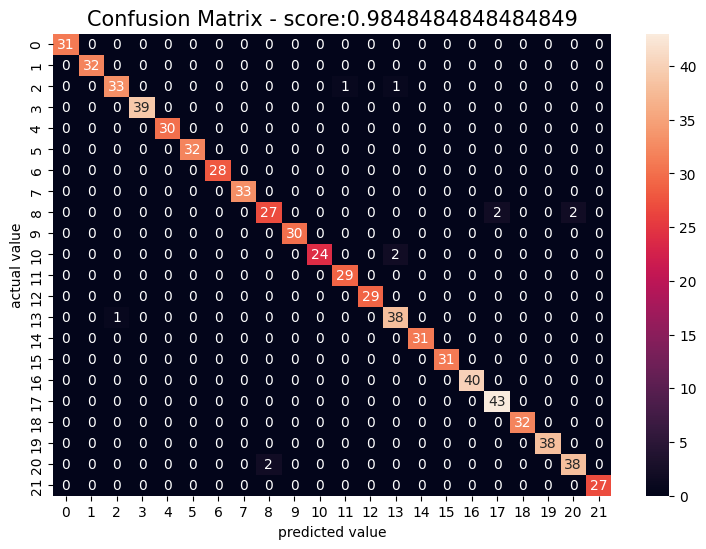

In [52]:
plt.figure(figsize=(9,6))
sns.heatmap(cmtest,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")
all_sample_title = 'Confusion Matrix - score:'+str(dtreepred)
plt.title(all_sample_title, size = 15);

In [53]:
print(f"the accurarcy score of decision tree algo is {dtreepred}")

the accurarcy score of decision tree algo is 0.9848484848484849


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predd))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.94      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.93      0.87      0.90        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.96    

###Predicting new crops with new parameter values

In [55]:
new_input=[[34,140,198,21.704170,93.440063,5.751707,115.178140]]

In [56]:
dtree.predict(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['apple'], dtype=object)